* Import necessary libraries and files

In [2]:
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
 
file = 'original_data/Lab_1_data.csv'

1. Load and print the first 5 observations of the dataset.

In [3]:
try:
    df = pd.read_csv(file)
except FileNotFoundError:
    print(f"Error: File '{file}' not found.")
except pd.errors.EmptyDataError:
    print(f"Error: File '{file}' is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the file '{file}'. Please check the file format.")

print("First 5 observations of the dataset:")
df['lfp'].replace(['no', 'yes'], [0, 1], inplace=True)
df['wc'].replace(['no', 'yes'], [0, 1], inplace=True)
df['hc'].replace(['no', 'yes'], [0, 1], inplace=True)
df.head()

First 5 observations of the dataset:


,Unnamed: 0.1,Unnamed: 0,lfp,k5,k618,age,wc,hc,lwg,inc
0,0,1,1,1,0,32,0,0,1.210165,10.910001
1,1,2,1,0,2,30,0,0,0.328504,19.500000
2,2,3,1,1,3,35,0,0,1.514128,12.039999
3,3,4,1,0,3,34,0,0,0.092115,6.800000
4,4,5,1,1,2,31,1,0,1.524280,20.100000


In [4]:
df = df.drop(columns=['Unnamed: 0.1'])
df = df.drop(columns=['Unnamed: 0'])
df.head()

,lfp,k5,k618,age,wc,hc,lwg,inc
0,1,1,0,32,0,0,1.210165,10.910001
1,1,0,2,30,0,0,0.328504,19.500000
2,1,1,3,35,0,0,1.514128,12.039999
3,1,0,3,34,0,0,0.092115,6.800000
4,1,1,2,31,1,0,1.524280,20.100000


3. Check the types of your data

In [5]:
print(df.dtypes)

lfp       int64
k5        int64
k618      int64
age       int64
wc        int64
hc        int64
lwg     float64
inc     float64
dtype: object


In [6]:
categorical_columns = ['wc', 'hc']
df[categorical_columns] = df[categorical_columns].astype('category')

print(df.dtypes)

lfp        int64
k5         int64
k618       int64
age        int64
wc      category
hc      category
lwg      float64
inc      float64
dtype: object


4. Compile the table with summary statistics (min, max, med, etc.)

In [8]:
summary_stats = df.describe() 
skew_values = df.skew(numeric_only=True)
var_values = df.var(numeric_only=True)
kurtosis_values = df.kurtosis(numeric_only=True)
summary_stats.loc['Skewness'] = skew_values
summary_stats.loc['Variance'] = var_values
summary_stats.loc['Kurtosis'] = kurtosis_values
print(summary_stats)

                 lfp          k5        k618         age         lwg  \
count     753.000000  753.000000  753.000000  753.000000  753.000000   
mean        0.568393    0.237716    1.353254   42.537849    1.097115   
std         0.495630    0.523959    1.319874    8.072574    0.587556   
min         0.000000    0.000000    0.000000   30.000000   -2.054124   
25%         0.000000    0.000000    0.000000   36.000000    0.818087   
50%         1.000000    0.000000    1.000000   43.000000    1.068403   
75%         1.000000    0.000000    2.000000   49.000000    1.399717   
max         1.000000    3.000000    8.000000   60.000000    3.218876   
Skewness   -0.276720    2.314131    0.909535    0.151180   -0.400005   
Variance    0.245649    0.274533    1.742067   65.166451    0.345223   
Kurtosis   -1.928556    5.297390    0.823243   -1.017711    4.075111   

                 inc  
count     753.000000  
mean       20.128965  
std        11.634799  
min        -0.029000  
25%        13.025000

5. Examine and comment on the table and report if you see anything unusual in the statistics of your variables

In [9]:
df = df.loc[df['inc'] >= 0]
negative_val_count = (df['inc'] < 0).sum()
print('Number of negative values is ', negative_val_count)

Number of negative values is  0


In [10]:
nan_count = df.isna().sum()
 
columns_with_nan = nan_count[nan_count > 0].index
print("Columns with NaN values:", columns_with_nan)

for col in columns_with_nan: 
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Verify that NaN values have been replaced
nan_after_replacement = df.isna().sum()
print("NaN values after replacement:", nan_after_replacement)

Columns with NaN values: Index([], dtype='object')
NaN values after replacement: lfp     0
k5      0
k618    0
age     0
wc      0
hc      0
lwg     0
inc     0
dtype: int64


In [11]:
nan_count = df.isnull().sum()

columns_with_nan = nan_count[nan_count > 0].index
print("Columns with null values:", columns_with_nan)

for col in columns_with_nan:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Verify that NaN values have been replaced
nan_after_replacement = df.isnull().sum()
print("null values after replacement:", nan_after_replacement)

Columns with null values: Index([], dtype='object')
null values after replacement: lfp     0
k5      0
k618    0
age     0
wc      0
hc      0
lwg     0
inc     0
dtype: int64


7. Produce the histograms of all variables (except wc and hc) and comment on their distributions

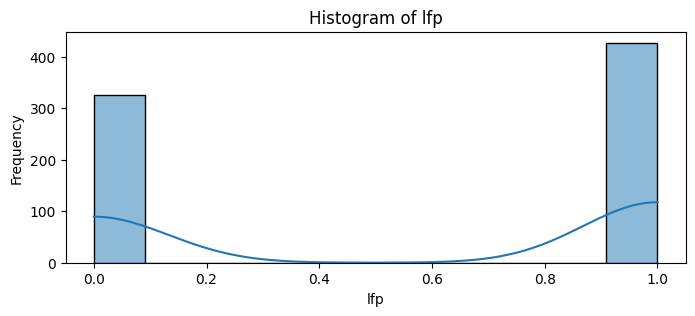

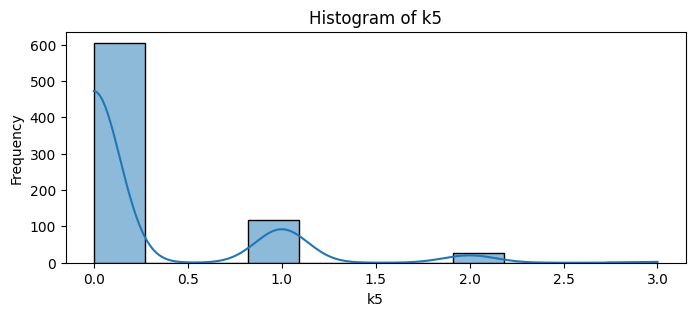

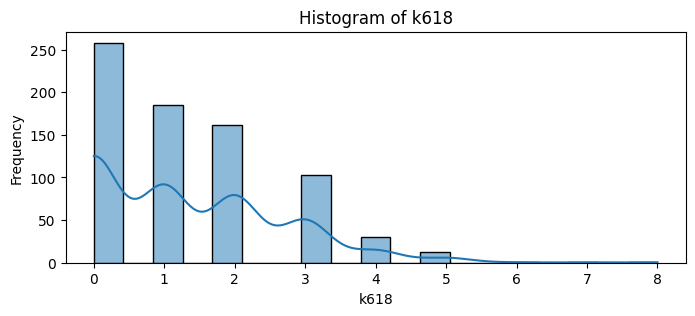

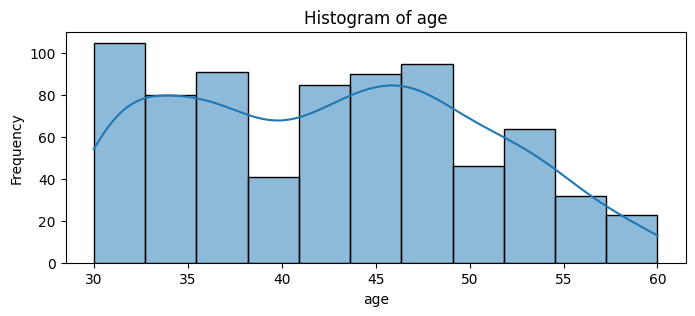

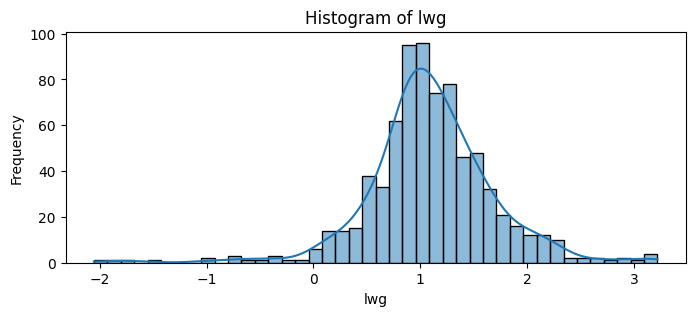

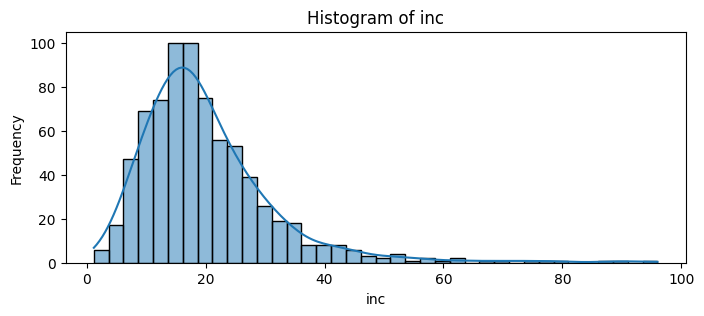

In [12]:
columns = [col for col in df.columns if col not in ['wc', 'hc']]

for col in columns:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

8. Create box plots for all variables where you split by the lfp variable (make sure to adjust the number of axes)

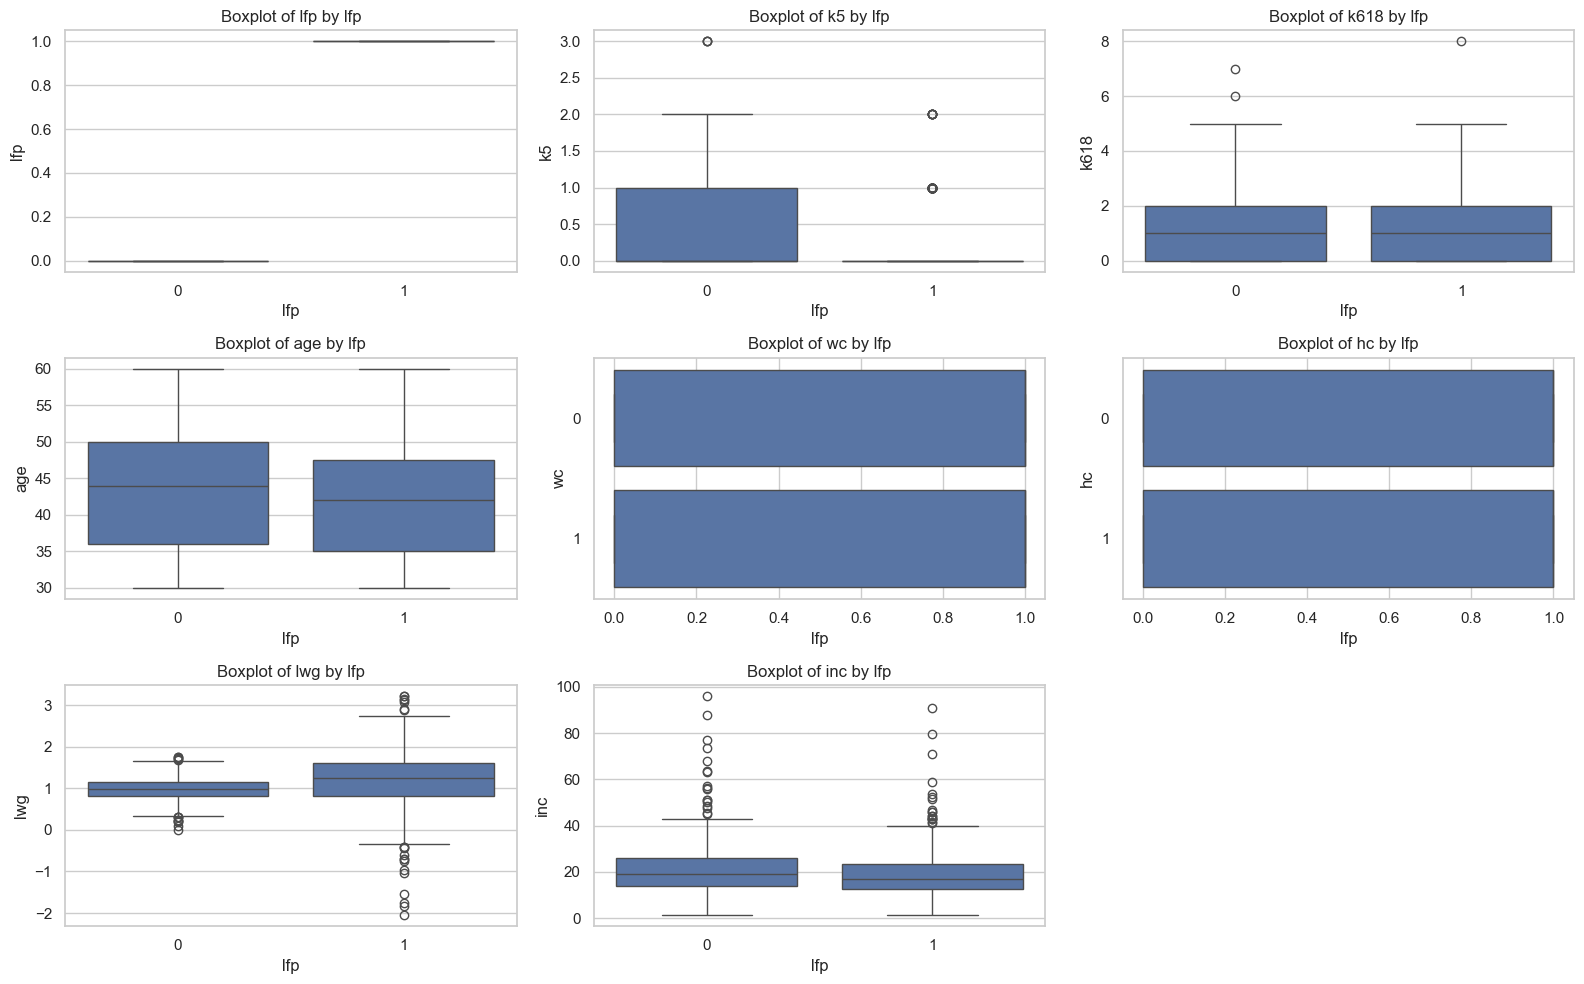

In [13]:
sns.set(style="whitegrid")
 
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='lfp', y=col, data=df)
    plt.title(f'Boxplot of {col} by lfp')
    plt.xlabel('lfp')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


9. Create the heatmap and add the correlation coefficients to it

<AxesSubplot: >

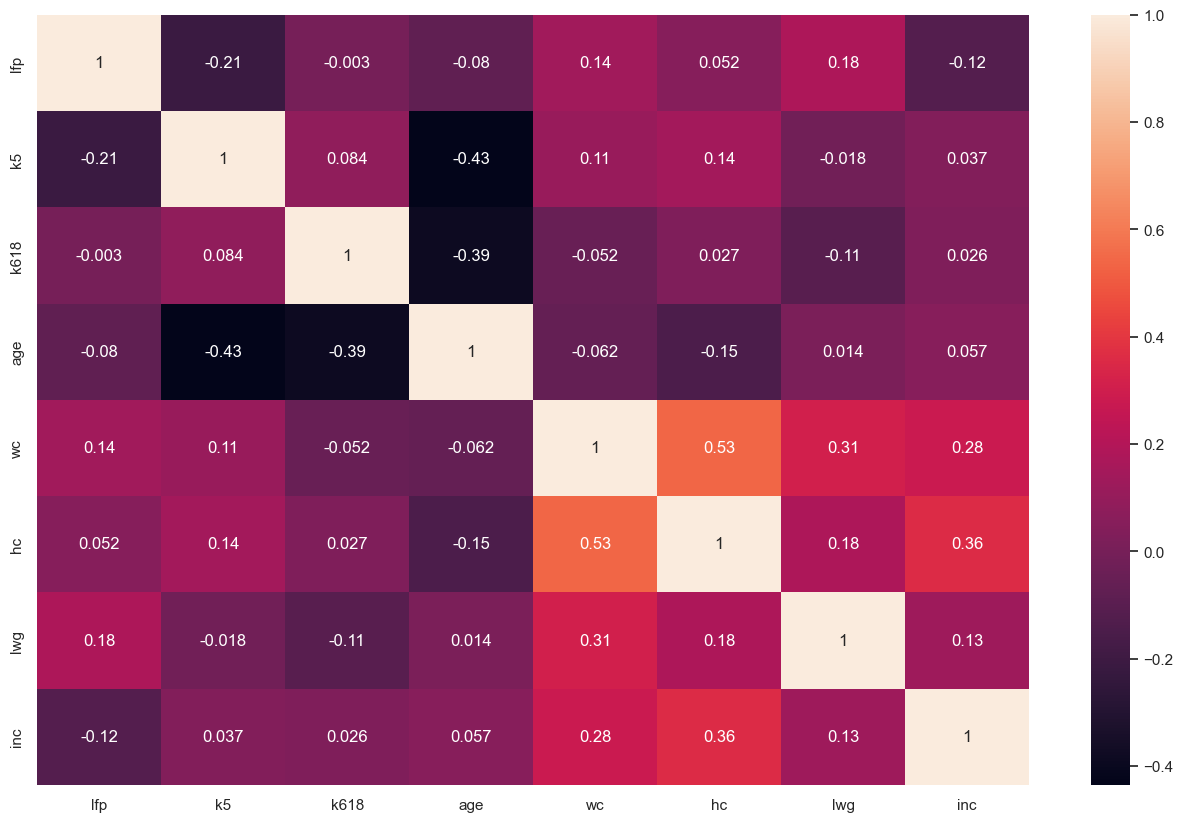

In [27]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=None), annot=True)

What are the 5 strongest correlations that you see?**  
1. age - k5 (negative)
2. age - k618 (negative)
3. lwg - wc (positive)
4. hc - inc (positive)
5. hc - wc (positive)

10. Run a Logit regression

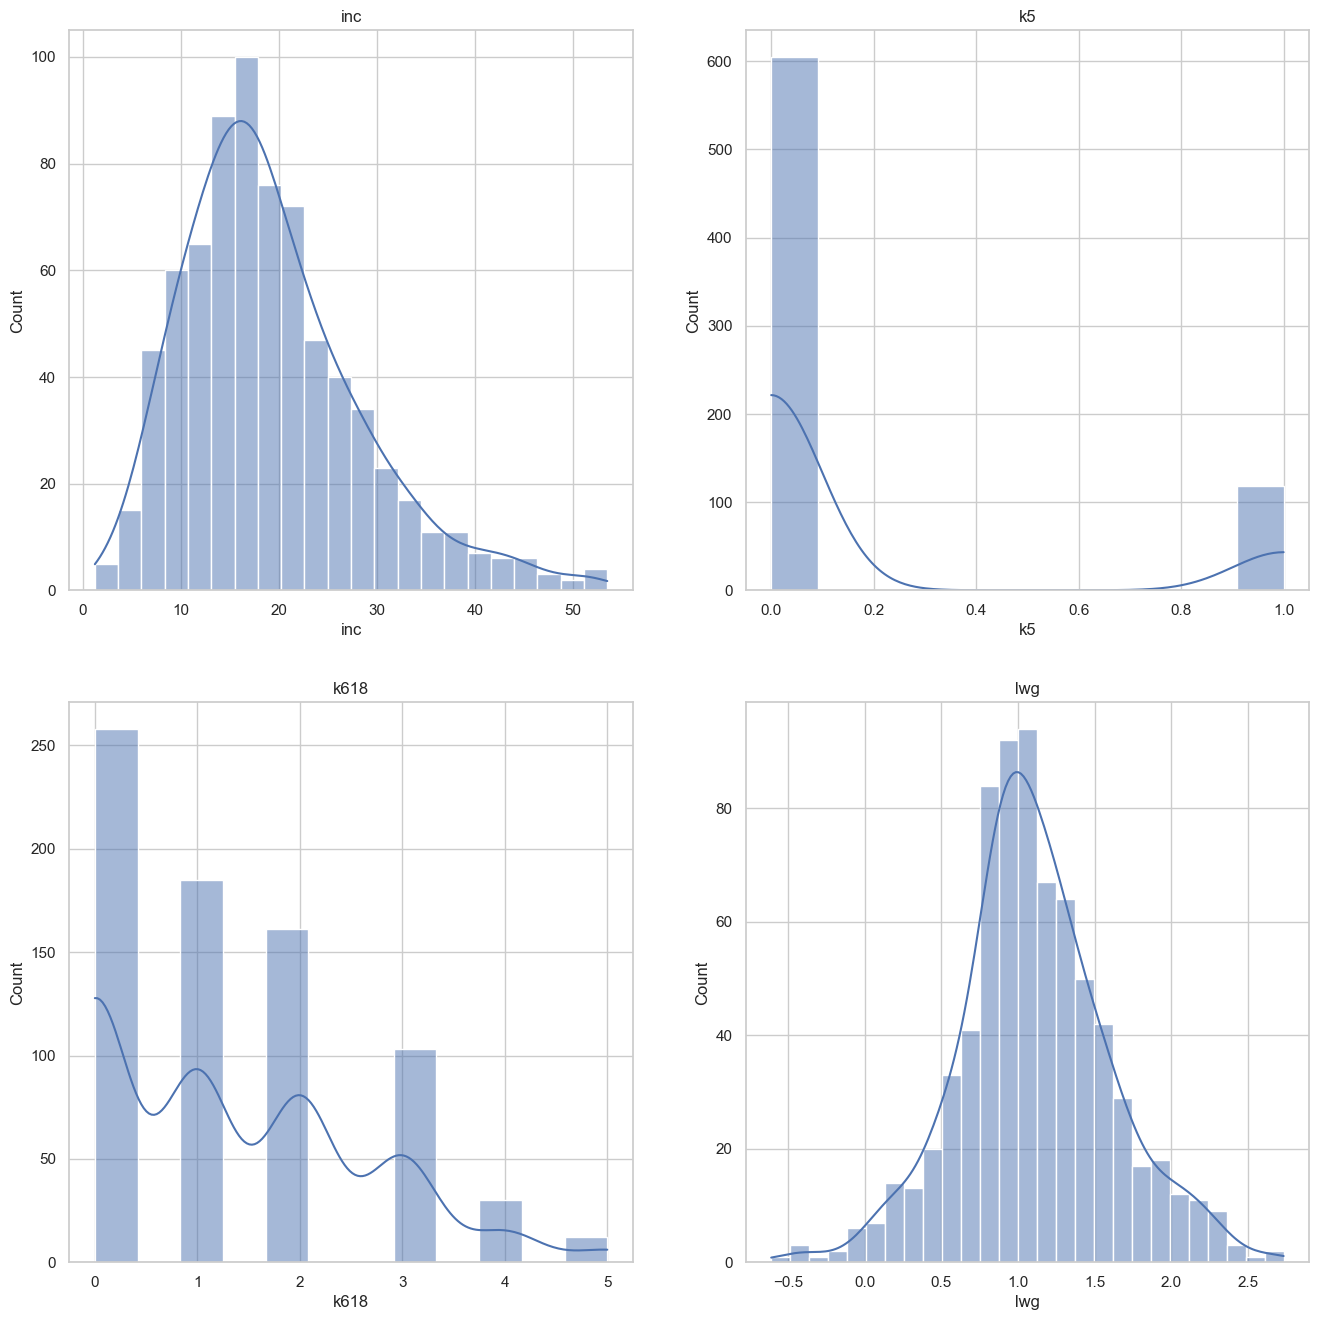

In [31]:
# removing outliers via inter quartile range
def iqr(data, column):
  lower_limit = data[column].mean() - 3*data[column].std()
  upper_limit = data[column].mean() + 3*data[column].std()

  return data[(data[column] > lower_limit) & (data[column] < upper_limit)]

figure, axis = plt.subplots(2, 2, figsize=(16, 16))
axis = axis.flatten()
columns = ['inc', 'k5', 'k618', 'lwg']

for index, columns in zip(range(5), columns):
  cleansed_data = iqr(df, columns)
  sns.histplot(cleansed_data[columns], kde=True, ax=axis[index])
  axis[index].set_title(columns)

In [75]:
# Define dependent and independent variables
y = cleansed_data['lfp']
x = cleansed_data.drop(['lfp'], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Implementing Logistic Regression using sklearn
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(x_train, y_train)

# Print the regression coefficients

print("The intercept b0= ", model_logistic.intercept_)
print("The coefficient b1= ", model_logistic.coef_)

The intercept b0=  [2.99955475]
The coefficient b1=  [[-1.4970648  -0.075189   -0.06050038  0.67800019  0.14696328  0.74747947
  -0.03826925]]


In [76]:
# Make prediction for the test data
y_predict = model_logistic.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7364864864864865


11. Run a Probit model

In [77]:
X = sm.add_constant(cleansed_data.drop('lfp', axis=1))
probit_model = sm.Probit(cleansed_data['lfp'], X)
probit_result = probit_model.fit()

print(probit_result.summary())


Optimization terminated successfully.
         Current function value: 0.593869
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                    lfp   No. Observations:                  736
Model:                         Probit   Df Residuals:                      728
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.1347
Time:                        23:08:52   Log-Likelihood:                -437.09
converged:                       True   LL-Null:                       -505.12
Covariance Type:            nonrobust   LLR p-value:                 3.387e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6385      0.394      4.156      0.000       0.866       2.411
k5            -0.8842      0.

In [80]:
y_prob = probit_result.predict(X)

# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
y_pred = (y_prob > 0.5).astype(int)  # 0.5 is the threshold

# calculate accuracy manually by comparing predicted values to actual values
accuracy = (y_pred == cleansed_data['lfp']).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.686141304347826
